In [42]:
import pandas as pd
import matplotlib.pyplot as plt

Прочитайте csv файл (використовуйте функцію read_csv)

In [43]:
df = pd.read_csv("bestsellers with categories.csv")

Виведіть перші п'ять рядків (використовується функція head)

In [44]:
print(df.head)

<bound method NDFrame.head of                                                   Name  \
0                        10-Day Green Smoothie Cleanse   
1                                    11/22/63: A Novel   
2              12 Rules for Life: An Antidote to Chaos   
3                               1984 (Signet Classics)   
4    5,000 Awesome Facts (About Everything!) (Natio...   
..                                                 ...   
545       Wrecking Ball (Diary of a Wimpy Kid Book 14)   
546  You Are a Badass: How to Stop Doubting Your Gr...   
547  You Are a Badass: How to Stop Doubting Your Gr...   
548  You Are a Badass: How to Stop Doubting Your Gr...   
549  You Are a Badass: How to Stop Doubting Your Gr...   

                       Author  User Rating  Reviews  Price  Year        Genre  
0                    JJ Smith          4.7    17350      8  2016  Non Fiction  
1                Stephen King          4.6     2052     22  2011      Fiction  
2          Jordan B. Peterson    

Виведіть розміри датасету (використовуйте атрибут shape)

In [45]:
df.shape

(550, 7)


Про скільки книг зберігає дані датасет?
Відповідь: 550 книг.

Змінимо регістр на малий, а пробіл замінимо на нижнє підкреслення (snake_style). 
А заразом і вивчимо корисний атрибут датафрейму: columns (можна просто присвоїти список нових імен цьому атрибуту)

In [46]:
df.columns = ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']

# Первинне дослідження даних

Перевірте, чи у всіх рядків вистачає даних: виведіть кількість пропусків (na) у кожному зі стовпців (використовуйте функції isna та sum)

In [47]:
df_isna = df.isna().sum()
print(df_isna)

name           0
author         0
user_rating    0
reviews        0
price          0
year           0
genre          0
dtype: int64


Чи є в якихось змінних пропуски? (Так / ні)
Відповідь: ні.

Перевірте, які є унікальні значення в колонці genre (використовуйте функцію unique)

In [48]:
df_genre = df['genre'].unique()

print(df_genre)

['Non Fiction' 'Fiction']


Які є унікальні жанри?
Відповідь: 'Non Fiction' та 'Fiction'.

Тепер подивіться на розподіл цін: побудуйте діаграму (використовуйте kind='hist')

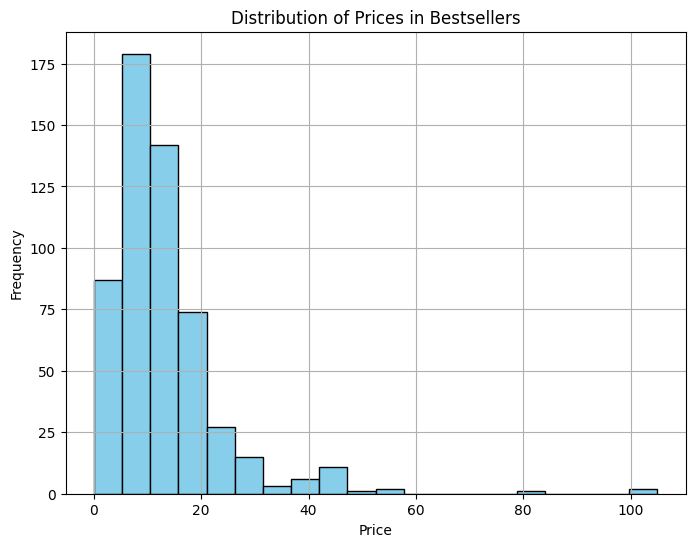

In [49]:
plt.figure(figsize=(8,6))
df['price'].plot(kind='hist', bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Prices in Bestsellers')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(True)

# Show the plot
plt.show()

Визначте, яка ціна у нас максимальна, мінімальна, середня, медіанна (використовуйте функції max, min, mean, median)

In [50]:
print(f"max price is {df['price'].max()}")
print(f"min price is {df['price'].min()}")
print(f"mean price is {df['price'].mean()}")
print(f"median price is {df['price'].median()}")

max price is 105
min price is 0
mean price is 13.1
median price is 11.0


Відповідь: Максимальна ціна 105.
Відповідь: Мінімальна ціна 0.
Відповідь: Середня ціна 13,1.
Відповідь: Медіанна ціна 11,1.

# Пошук та сортування даних

In [51]:
highest_rating = df['user_rating'].max()
print(highest_rating)


4.9


Який рейтинг у датасеті найвищий?  
Відповідь: 4,9.

In [52]:
highest_rating_count = df[df['user_rating'] == highest_rating].shape[0]
print(highest_rating_count)

52


Скільки книг мають такий рейтинг? 
Відповідь: 52.

In [53]:
most_reviews_book = df[df['reviews'] == df['reviews'].max()]['name'].values[0]
print(most_reviews_book)

Where the Crawdads Sing


Яка книга має найбільше відгуків?  
Відповідь: Where the Crawdads Sing.

In [54]:
top_50_2015 = df[df['year'] == 2015]
most_expensive_book_2015 = top_50_2015[top_50_2015['price'] == top_50_2015['price'].max()]['name'].values[0]
print(most_expensive_book_2015)

Publication Manual of the American Psychological Association, 6th Edition


З тих книг, що потрапили до Топ-50 у 2015 році, яка книга найдорожча (можна використати проміжний датафрейм)?  
Відповідь: Publication Manual of the American Psychological Association, 6th Edition.

In [55]:
fiction_2010_count = df[(df['year'] == 2010) & (df['genre'] == 'Fiction')].shape[0]
print(fiction_2010_count)

20


Скільки книг жанру Fiction потрапили до Топ-50 у 2010 році (використовуйте &)?  
Відповідь: 20.

In [56]:
books_4_9_2010_2011 = df[(df['user_rating'] == 4.9) & (df['year'].isin([2010, 2011]))].shape[0]
print(books_4_9_2010_2011)

1


Скільки книг з рейтингом 4.9 потрапило до рейтингу у 2010 та 2011 роках (використовуйте | або функцію isin)?  
Відповідь: 1.

Відсортуємо за зростанням ціни всі книги, які потрапили до рейтингу в 2015 році і коштують дешевше за 8 доларів (використовуйте функцію sort_values).

In [57]:
sorted_books_2015_under_8 = top_50_2015[top_50_2015['price'] < 8].sort_values(by='price')

In [58]:
last_sorted_book_2015 = sorted_books_2015_under_8.iloc[-1]['name'] if not sorted_books_2015_under_8.empty else None


print(last_sorted_book_2015)

Old School (Diary of a Wimpy Kid #10)


Яка книга остання у відсортованому списку?  
Відповідь: Old School (Diary of a Wimpy Kid #10).

# Агрегування даних та з'єднання таблиць

- Для початку давайте подивимося на максимальну та мінімальну ціни для кожного з жанрів (використовуйте функції groupby та agg, для підрахунку мінімальних та максимальних значень використовуйте max та min). Не беріть усі стовпці, виберіть тільки потрібні вам


In [59]:
price_stats_by_genre = df.groupby('genre').agg(max_price=('price', 'max'), min_price=('price', 'min'))
print(price_stats_by_genre)

             max_price  min_price
genre                            
Fiction             82          0
Non Fiction        105          0


Максимальна ціна для жанру Fiction: 82

Мінімальна ціна для жанру Fiction: 0

Максимальна ціна для жанру Non Fiction: 105

Мінімальна ціна для жанру Non Fiction: 0

- Тепер створіть новий датафрейм, який вміщатиме кількість книг для кожного з авторів (використовуйте функції groupby та agg, для підрахунку кількості використовуйте count). Не беріть усі стовпці, виберете тільки потрібні

In [ ]:
books_per_author_df = df.groupby('author').agg(book_count=('name', 'count')).reset_index()

In [63]:
books_per_author_df.shape

(248, 2)

Якої розмірності вийшла таблиця? 
248 рядків, 2 стовпця

In [64]:
books_per_author_df.loc[books_per_author_df['book_count'].idxmax()]

author        Jeff Kinney
book_count             12
Name: 120, dtype: object

Який автор має найбільше книг? 

Jeff Kinney

Скільки книг цього автора? 

12

- Тепер створіть другий датафрейм, який буде вміщати середній рейтинг для кожного автора (використовуйте функції groupby та agg, для підрахунку середнього значення використовуйте mean). Не беріть усі стовпці, виберете тільки потрібні

In [65]:
average_rating_per_author_df = df.groupby('author').agg(avg_rating=('user_rating', 'mean')).reset_index()

In [66]:
average_rating_per_author_df.loc[average_rating_per_author_df['avg_rating'].idxmin()]

author        Donna Tartt
avg_rating            3.9
Name: 71, dtype: object

У якого автора середній рейтинг мінімальний? 

Donna Tartt

Який у цього автора середній рейтинг? 

3.9

- З'єднайте останні два датафрейми так, щоб для кожного автора було видно кількість книг та середній рейтинг (Використовуйте функцію concat з параметром axis=1). Збережіть результат у змінну

In [67]:
combined_df = pd.concat([books_per_author_df.set_index('author'), average_rating_per_author_df.set_index('author')], axis=1)

Відсортуйте датафрейм за зростаючою кількістю книг та зростаючим рейтингом (використовуйте функцію sort_values)

In [72]:
sorted_combined_df = combined_df.sort_values(by=['book_count', 'avg_rating'], ascending=True)

print(sorted_combined_df)

                                    book_count  avg_rating
author                                                    
Muriel Barbery                               1    4.000000
Chris Cleave                                 1    4.100000
Ian K. Smith M.D.                            1    4.100000
Pierre Dukan                                 1    4.100000
Elizabeth Strout                             1    4.200000
...                                        ...         ...
American Psychological Association          10    4.500000
Suzanne Collins                             11    4.663636
Gary Chapman                                11    4.736364
Rick Riordan                                11    4.772727
Jeff Kinney                                 12    4.800000

[248 rows x 2 columns]


Який автор перший у списку?
Muriel Barbery